# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import folium
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Gcolab/london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
# Data Teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
# Data Terbawah
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
# Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


**Preposessing**

In [7]:
# Check standard missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [9]:
# Drop lsoa_code karena tidak dibutuhkan
df = df.drop("lsoa_code", axis=1)
df

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


In [10]:
df = df[df["value"]!=0]
df

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
13490581,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,Lewisham,Violence Against the Person,Common Assault,2,2013,7


**Visualsasi**

# Area Plot

In [11]:
df_borough = pd.pivot_table(df, index=["borough"], columns=["year"], aggfunc=np.sum, fill_value=0)
df_borough_crimes = df_borough["value"]
df_borough_crimes["total"] = df_borough_crimes.sum(axis=1)
df_borough_crimes.sort_values(by="total", ascending=False, inplace=True)

df_borough_crimes.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [13]:
df_area = df_borough_crimes.head()
df_area = df_area.transpose()

# Drop colom "total"
df_area.drop("total", axis=0, inplace=True)
df_area

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


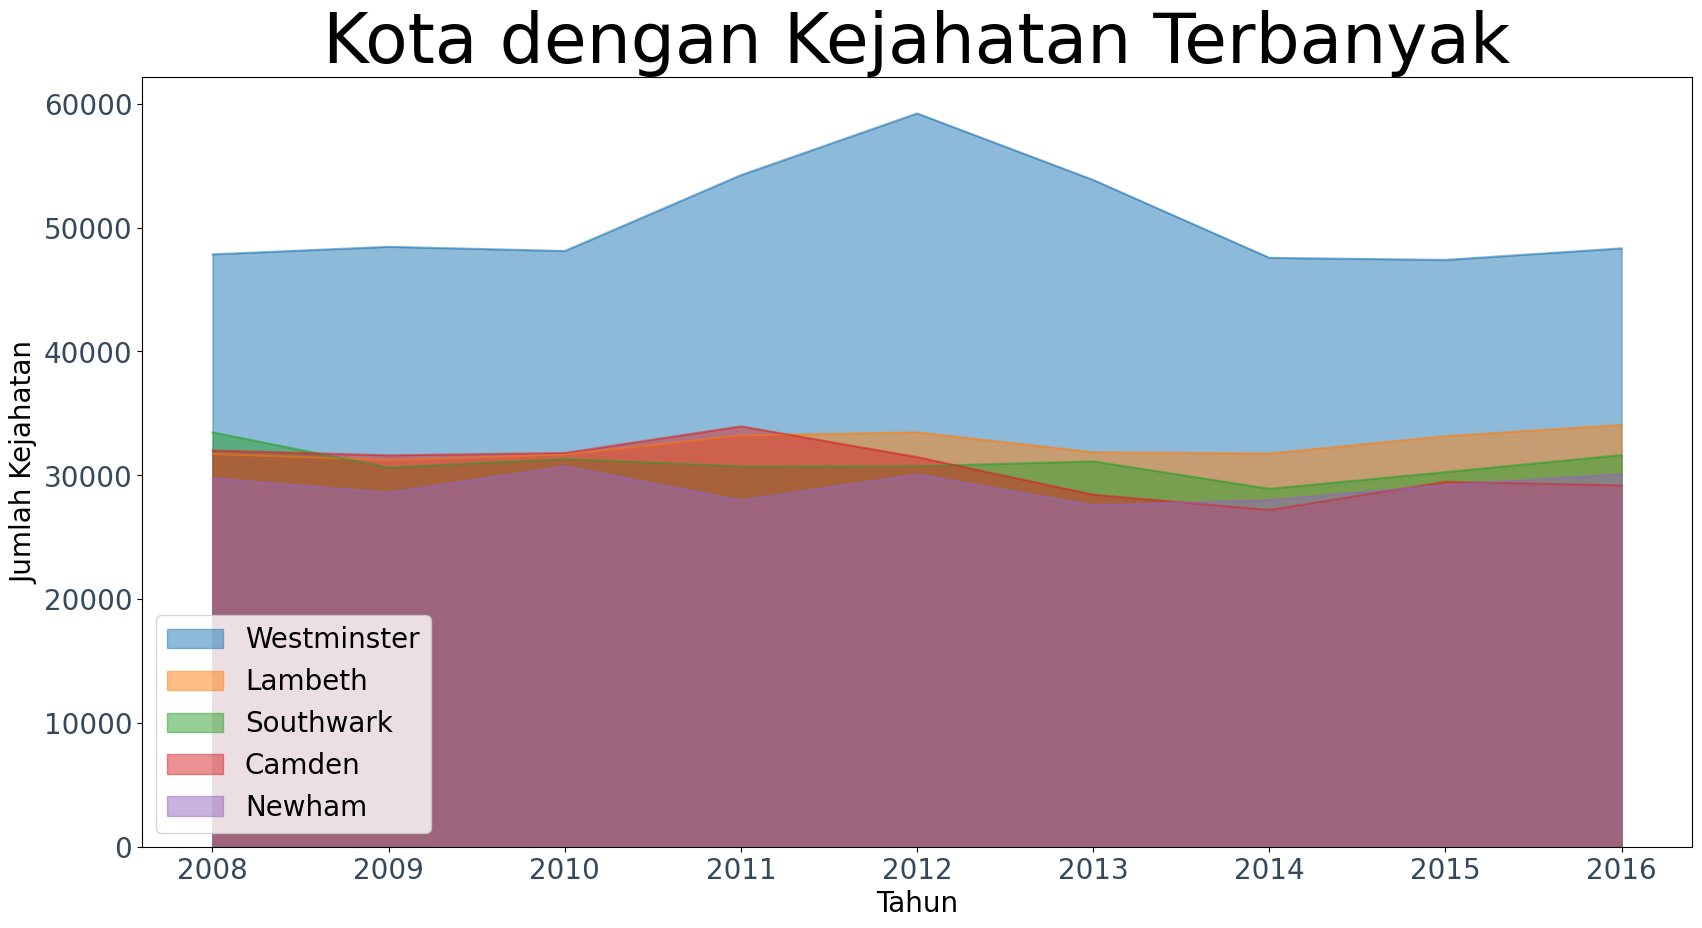

In [14]:
# Buat area plot

df_area.plot(kind="area", stacked=False, figsize=(20,10))

plt.title("Kota dengan Kejahatan Terbanyak",fontsize=50)
plt.xlabel("Tahun", fontsize=20)
plt.ylabel("Jumlah Kejahatan", fontsize=20)
plt.xticks(color="#34495e",fontsize=20)
plt.yticks(color="#34495e",fontsize=20)
plt.legend(loc="best", fontsize=20)
plt.show()


Dari plot diatas, dapat disimpulkan bahwa :
- dua kota dengan kejahatan terbanyak adalah Westminster dan Lambeth
- Kejahatan di kota Westminster selalu diatas 40000

# Histogram

In [15]:
# Buat data set 2012
df_2012 = df_borough_crimes[[2012]]
df_2012.head()

year,2012
borough,
Westminster,59226
Lambeth,33473
Southwark,30737
Camden,31472
Newham,30067


In [18]:
count, bin_edges = np.histogram(df_2012[2012])
print(count)
print(bin_edges)

[ 1  4  4 12  6  5  0  0  0  1]
[  157.   6063.9 11970.8 17877.7 23784.6 29691.5 35598.4 41505.3 47412.2
 53319.1 59226. ]


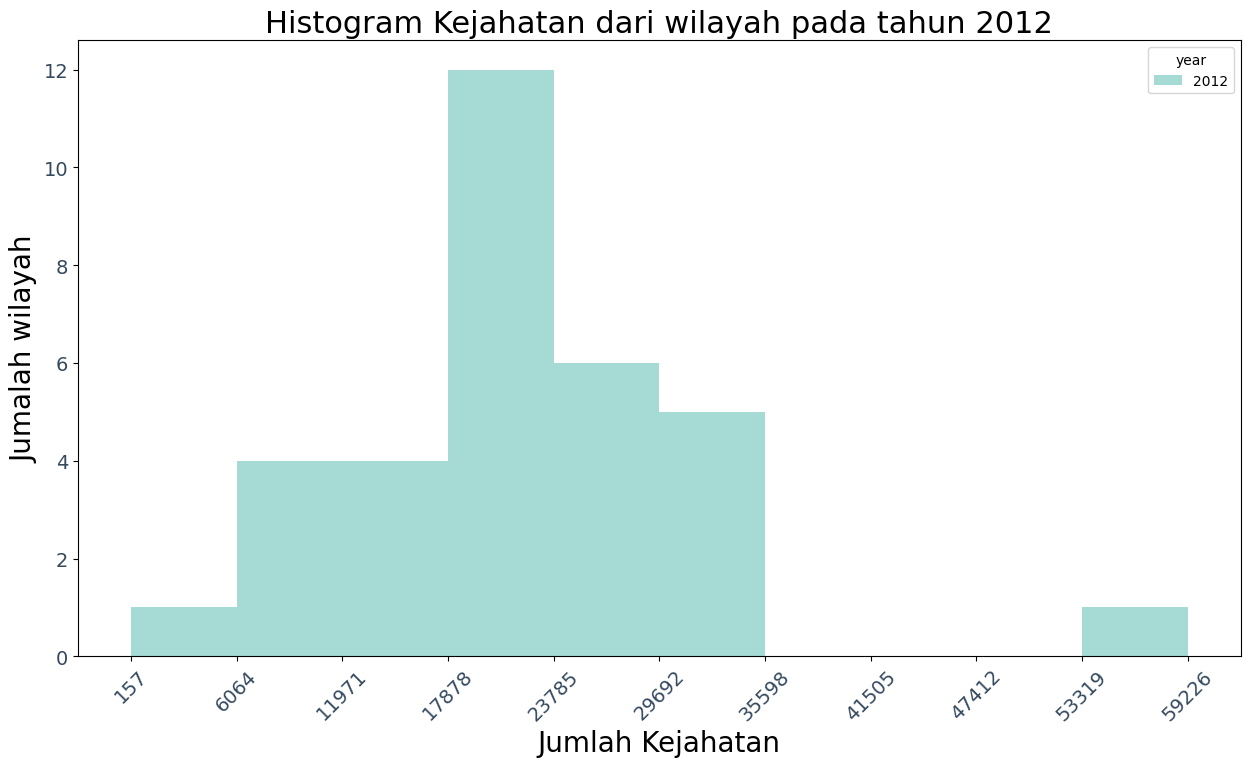

In [19]:
# buat Histogram
df_2012.plot(kind="hist", figsize=(15, 8), bins=10, xticks=bin_edges, alpha=0.7, color="#80cbc4")
plt.title("Histogram Kejahatan dari wilayah pada tahun 2012", fontsize=22)
plt.xlabel("Jumlah Kejahatan", fontsize=20)
plt.ylabel("Jumalah wilayah", fontsize=20)
plt.xticks(color="#34495e",fontsize=14, rotation=45)
plt.yticks(color="#34495e",fontsize=14)

plt.show()

Jumlah kejahatan antara 17878 hingga 23785 terdapat pada 12 kota/wilayah

# Line Plot

In [20]:
df_year = pd.DataFrame(df_borough_crimes)
df_year = df_year.transpose()
# Drop colom total
df_year.drop("total", axis=0, inplace=True)

df_year["total"] = df_year.sum(axis=1)
df_year = df_year[["total"]]
df_year

borough,total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


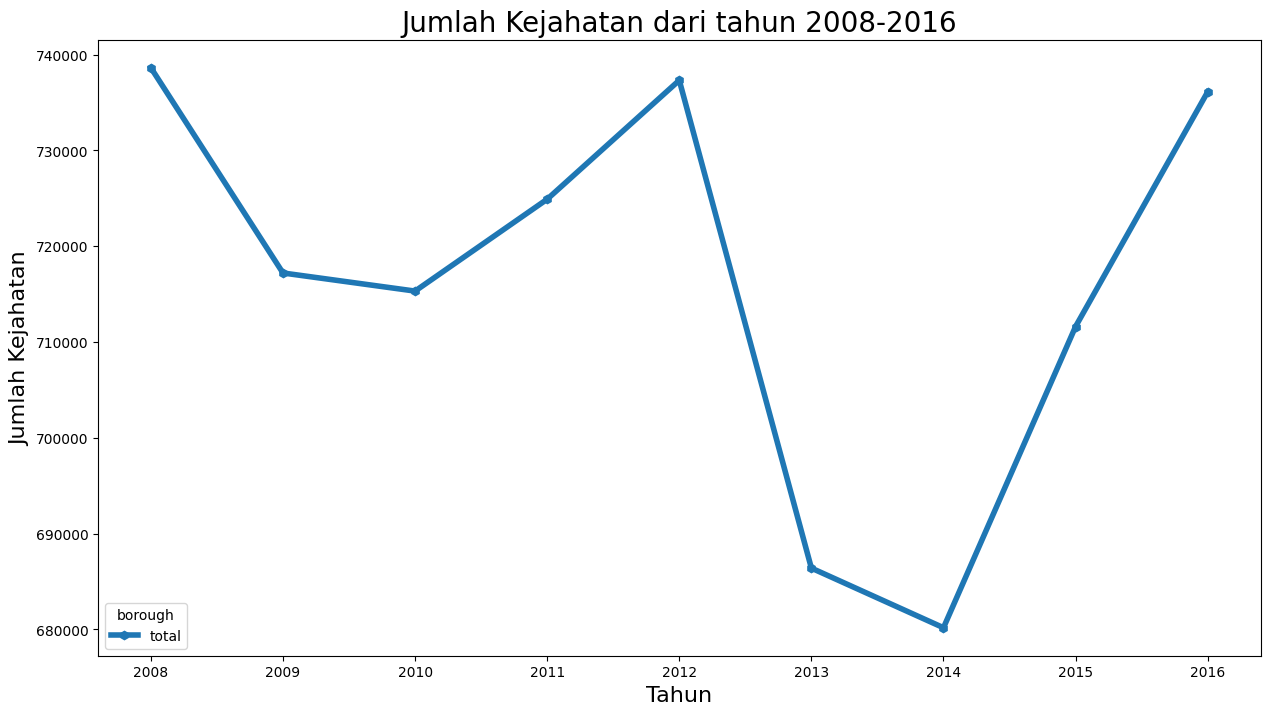

In [22]:
# buat Line Plot
df_year.plot(kind="line", figsize=(15,8), linewidth=4, marker='h')

plt.title("Jumlah Kejahatan dari tahun 2008-2016", fontsize=20)
plt.xlabel("Tahun", fontsize=16)
plt.ylabel("Jumlah Kejahatan", fontsize=16)

plt.show()

Dari plot diatas, dapat disimpulkan bahwa Kejahatan tertinggi terjadi pada tahun 2008 dan yang paling sedikit pada tahun 2014

# Bar Chart

In [23]:
# Buat dataset
df_major_crimes = df_borough_crimes[["total"]]
df_major_crimes.reset_index(inplace=True)
df_major_crimes


year,borough,total
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024
5,Croydon,260294
6,Ealing,251562
7,Islington,230286
8,Tower Hamlets,228613
9,Brent,227551


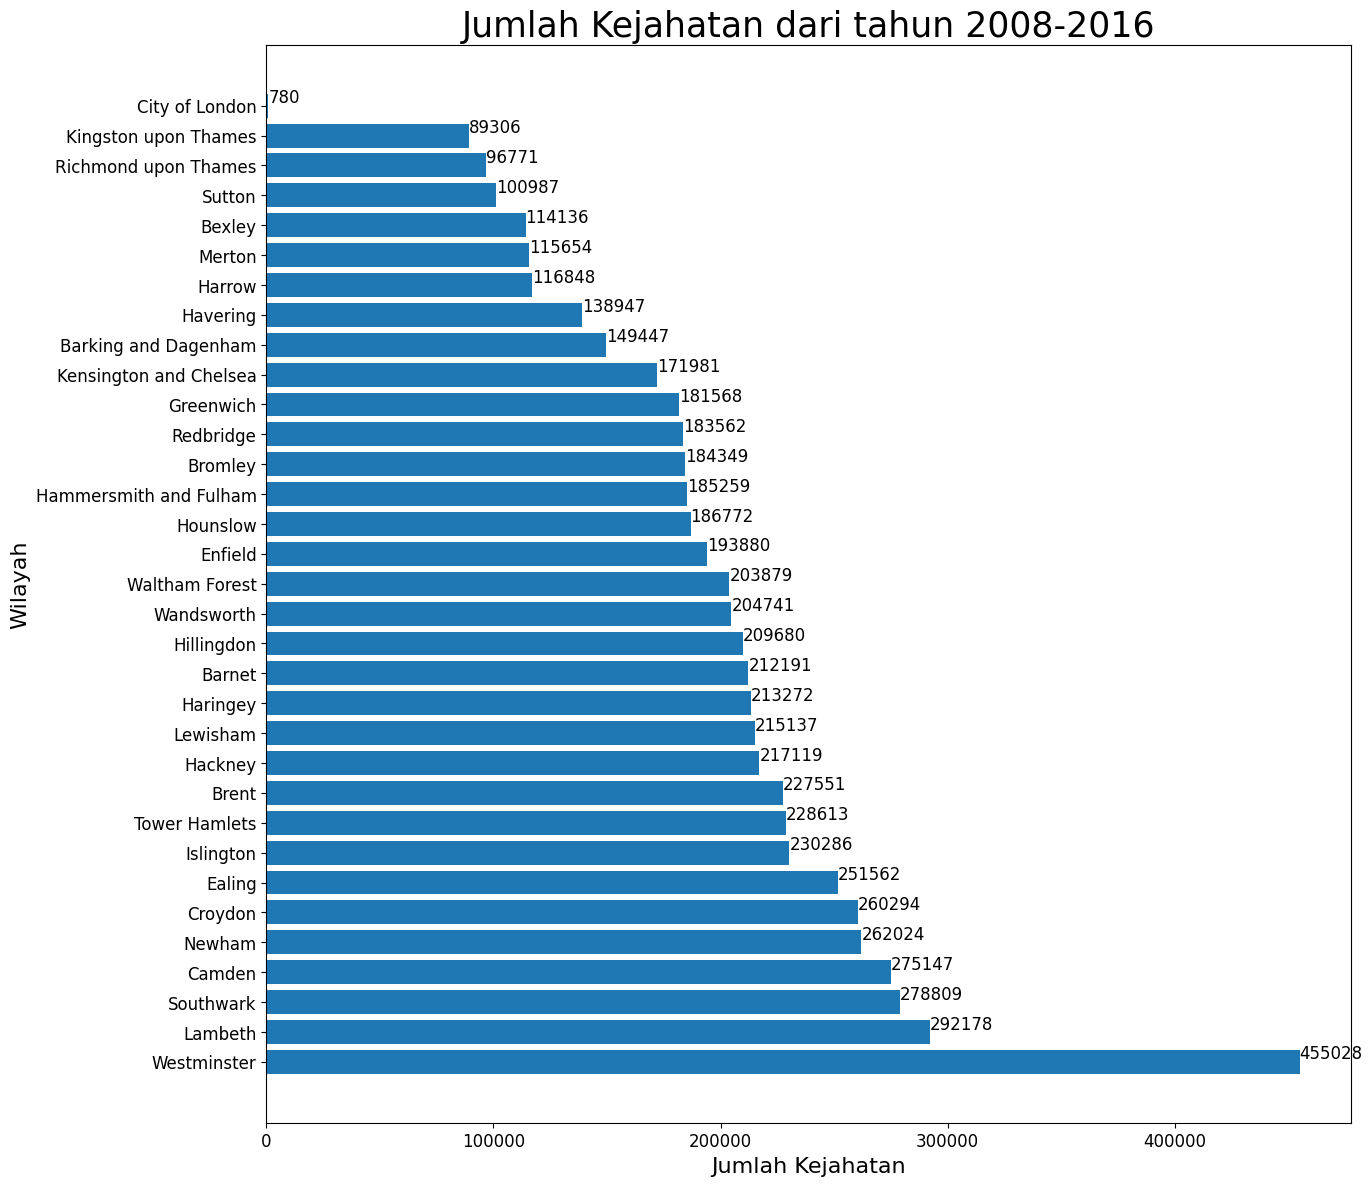

In [24]:
x = df_major_crimes["borough"]
y = df_major_crimes["total"]


fig, ax = plt.subplots(figsize = (14, 14))
barh = ax.barh(x, y)
ax.set_title("Jumlah Kejahatan dari tahun 2008-2016", fontsize=25)
ax.set_xlabel("Jumlah Kejahatan", fontsize=16)
ax.set_ylabel("Wilayah", fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)


for i in ax.patches:
    plt.text(i.get_width()-0.3, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 12)

plt.show()

Tingkat kejahatan di Kota London merupakan yang terendah dengan jumlah kasus 780

# Pie Chart

In [25]:
# buat dataset
df_major = pd.pivot_table(df,index=["major_category"], columns=["borough"], aggfunc=np.sum, fill_value=0)

df_major["total"] = df_major.sum(axis=1)
df_crimes = pd.DataFrame(df_major)
df_crimes["total"] = df_crimes.sum(axis=1)
df_crimes = df_crimes[["total"]]
df_crimes = df_crimes.sort_values(by="total", ascending=False).head(5)
df_crimes

,total
borough,
major_category,
Theft and Handling,4595453430
Violence Against the Person,3616238066
Criminal Damage,1883300220
Burglary,1782549664
Drugs,936958592


In [26]:
# Ubah DataFrame menjadi array numpy
arr = pd.DataFrame(df_crimes).to_numpy()
print(arr.shape)

result_ = arr.ravel()
print(result_.shape)

(5, 1)
(5,)


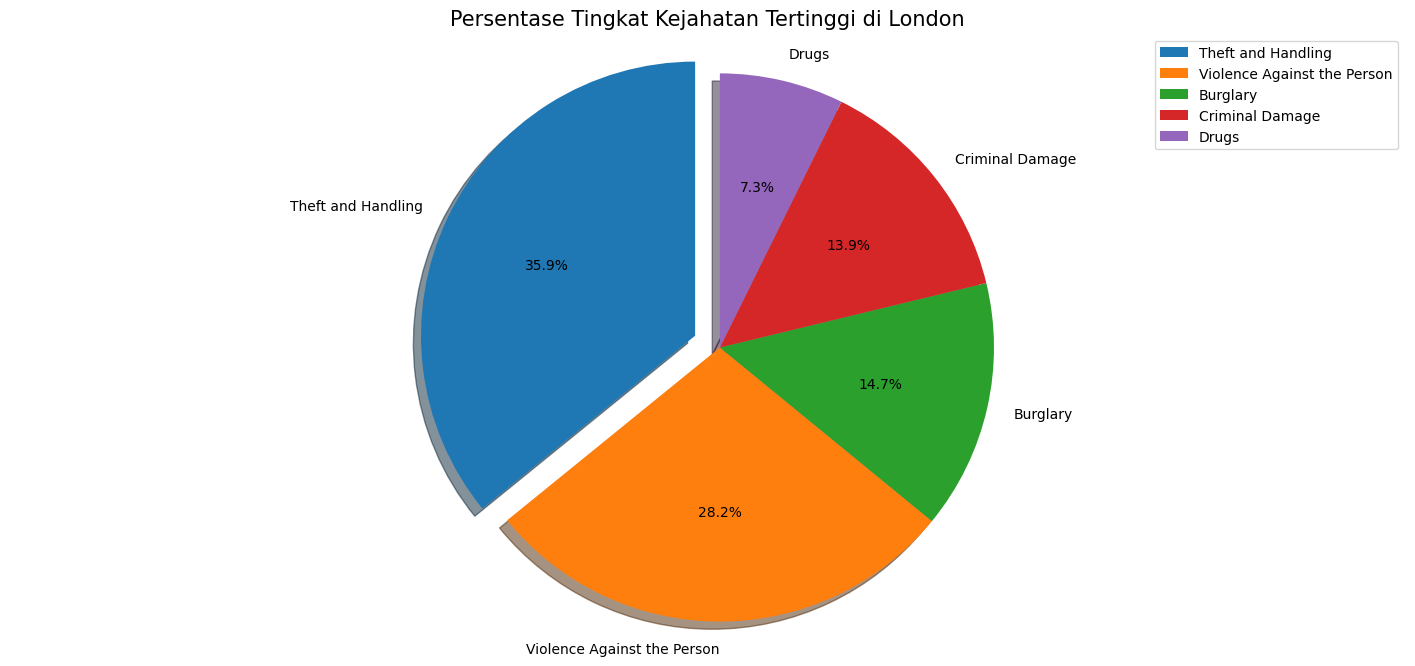

In [29]:
my_labels = ["Theft and Handling", "Violence Against the Person", "Burglary", "Criminal Damage", "Drugs"]
# Buat Pie Chart
fig = plt.figure(figsize =(18, 8))
explode = (0.1, 0, 0, 0, 0)
plt.pie(result_, explode=explode, labels=my_labels, shadow=True, autopct="%1.1f%%", startangle=90)
plt.title("Persentase Tingkat Kejahatan Tertinggi di London", fontsize=15)
plt.legend(loc="best")
plt.axis("equal")

plt.show()

Theft dan handling merupakan jenis kejahatan tertinggi di Kota London sebesar 35.9% dan Drugs yang terendah dengan 7.3%

# Box Plot

In [30]:
# Buat dataset
df_bp = pd.DataFrame(df_borough_crimes)
df_bp.drop("total", axis=1, inplace=True)
df_bp = df_bp.transpose()
df_bp = df_bp[["Brent", "Barnet"]]
df_bp.describe()

borough,Brent,Barnet
count,9.000000,9.000000
mean,25283.444444,23576.777778
std,1394.413059,702.366852
min,23504.000000,22510.000000
25%,24426.000000,23416.000000
50%,24883.000000,23573.000000
75%,26357.000000,24007.000000
max,27669.000000,24684.000000


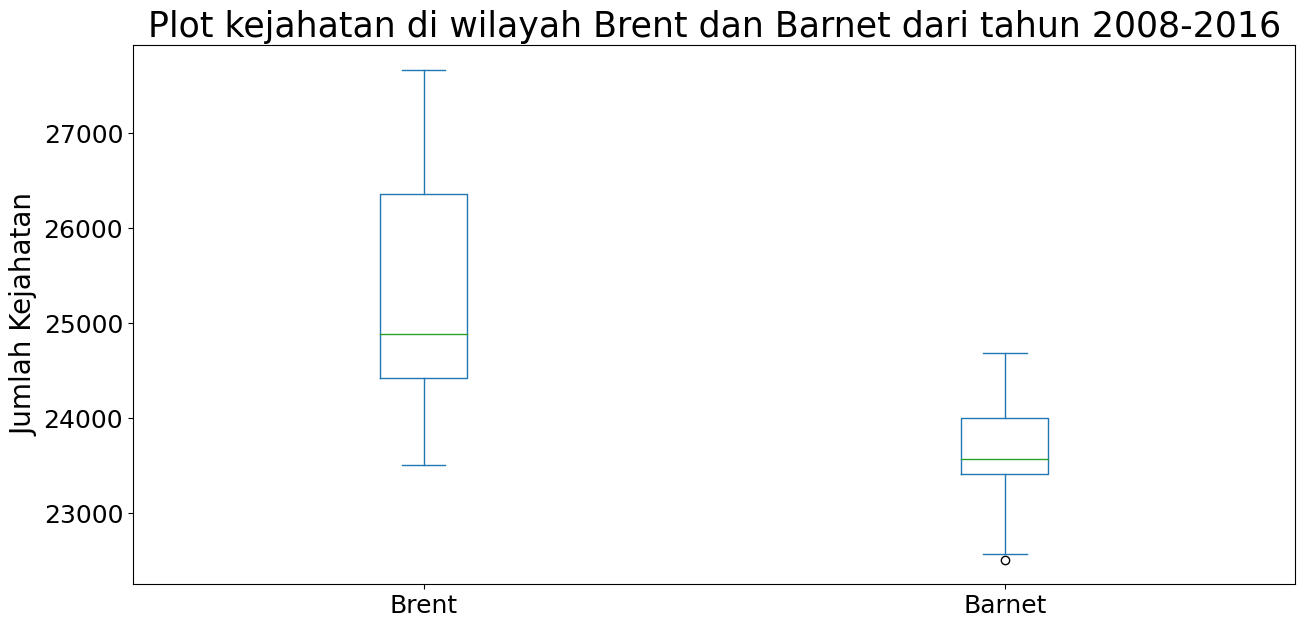

In [31]:
# Buat Box Plot
df_bp.plot(kind="box", figsize=(15, 7))
plt.title("Plot kejahatan di wilayah Brent dan Barnet dari tahun 2008-2016", fontsize=25)
plt.ylabel("Jumlah Kejahatan", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Scatter Plot

In [32]:
# Dataset
df_total_crimes = pd.DataFrame(df_borough_crimes)
df_total_crimes.drop("total", axis=1, inplace=True)
df_total_crimes = df_total_crimes.transpose()
df_total_crimes["total"] = df_total_crimes.sum(axis=1)
df_total_crimes.reset_index(inplace=True)
df_total_crimes

borough,year,Westminster,Lambeth,Southwark,Camden,Newham,Croydon,Ealing,Islington,Tower Hamlets,...,Barking and Dagenham,Havering,Harrow,Merton,Bexley,Sutton,Richmond upon Thames,Kingston upon Thames,City of London,total
0,2008,47846,31717,33470,32010,29752,29516,28947,26273,23578,...,17656,15395,13774,13875,15305,12943,11106,10661,0,738641
1,2009,48456,31225,30623,31612,28610,29784,28617,25485,21959,...,17713,14538,13948,13561,14445,12240,10618,10163,0,717214
2,2010,48116,31671,31320,31804,30728,29373,31360,24693,23072,...,17130,14957,13945,13595,13166,12032,10601,10171,0,715324
3,2011,54243,33224,30723,33956,27978,29830,29537,24980,24712,...,16686,15496,12801,13548,11325,11068,10896,10155,69,724915
4,2012,59226,33473,30737,31472,30067,30189,28832,26268,26784,...,15990,15965,12803,12856,11669,10948,11168,9956,157,737329
5,2013,53852,31868,31128,28435,27577,27444,25917,23784,26258,...,15759,15089,11914,11595,11552,10057,10439,9191,110,686407
6,2014,47564,31765,28912,27198,28005,27357,24978,24679,25504,...,15426,14734,11909,11596,11844,10443,10456,9288,115,680183
7,2015,47395,33164,30260,29477,29217,28089,26247,27032,27493,...,16346,15870,12601,12273,11990,10598,10413,9738,151,711624
8,2016,48330,34071,31636,29183,30090,28712,27127,27092,29253,...,16741,16903,13153,12755,12840,10658,11074,9983,178,736121


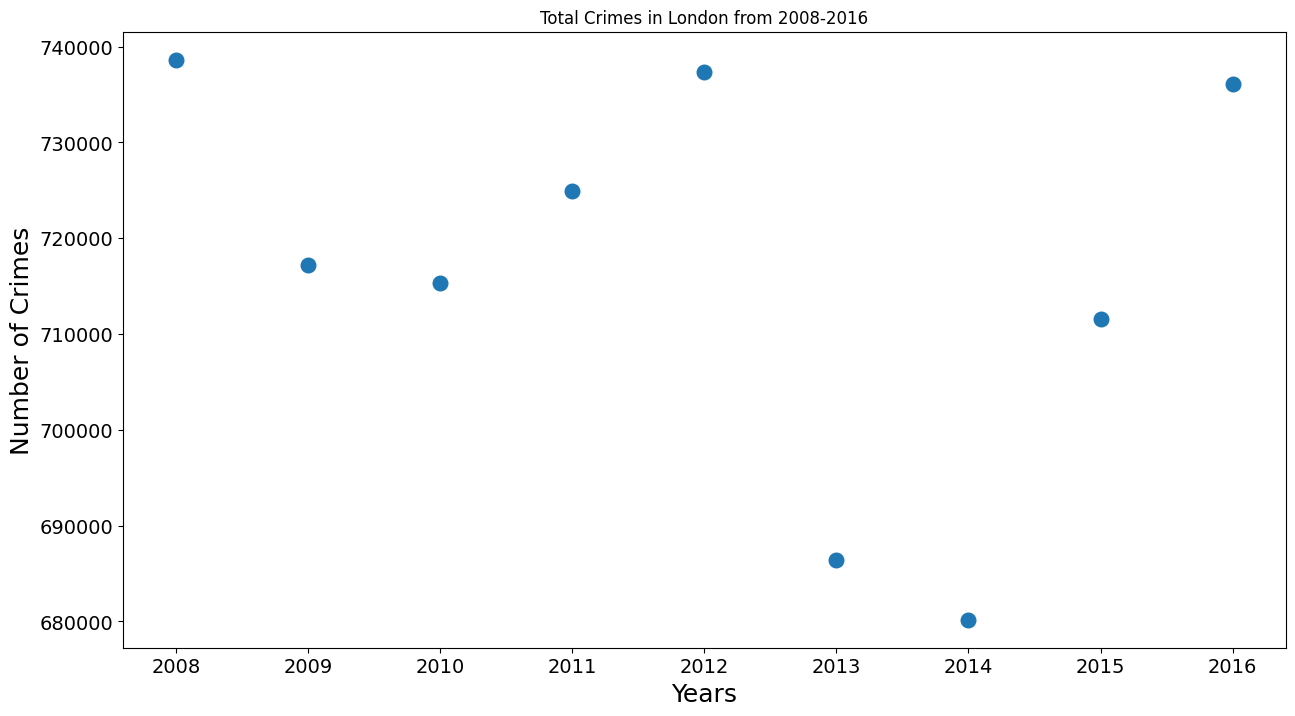

In [34]:
# Creating the Scatter Plot
df_total_crimes.plot(kind="scatter", x="year", y="total", figsize=(15,8), s=110)
plt.title("Total Crimes in London from 2008-2016")
plt.xlabel("Years", fontsize=18)
plt.ylabel("Number of Crimes", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# WordClouds

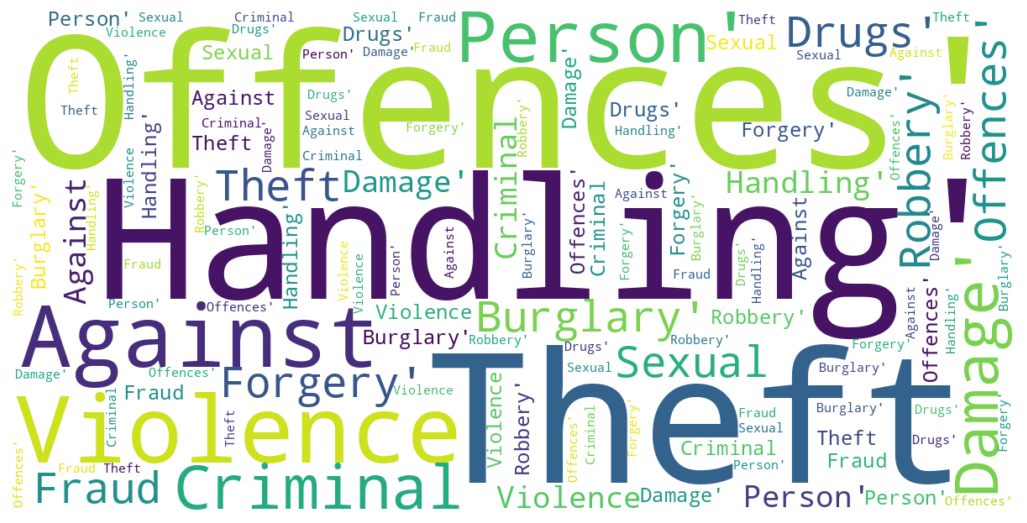

In [36]:
text = df["major_category"].value_counts().to_dict()

stop_words = ["and", "or", "the", "other", " '", "Person", "Notifiable"]

wordcloud = WordCloud(scale=3,
                      background_color = "white",
                      max_words = 1000,
                      relative_scaling="auto",
                      stopwords = stop_words,
                      repeat=True).generate_from_text(str(text))

fig=plt.figure()
fig.set_figwidth(13)
fig.set_figheight(13)
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear", cmap=plt.cm.gray)
plt.axis("off")
plt.show()

Semakin besar kata yang ditampilkan maka semakin tinggi jumlah kejahatahn itu yakni Offences, Handling, dan Theft.

# Kesimpulan

Berdasarkan hasil dari visualisasi  dapat disimpulkan  bahwa Kejahatan tertinggi terjadi pada tahun 2008 dan yang paling sedikit pada tahun 2014 dan juga dua kota dengan kejahatan terbanyak adalah Westminster dan Lambeth